In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv("../data/youtube_shorts_tiktok_trends_2025.csv")
df_ml = pd.read_csv("../data/youtube_shorts_tiktok_trends_2025.csv_ML.csv")
df_country = pd.read_csv("../data/country_platform_summary_2025.csv")
df_monthly = pd.read_csv("../data/monthly_trends_2025.csv")
df_hashtags = pd.read_csv("../data/top_hashtags_2025.csv")
df_creators = pd.read_csv("../data/top_creators_impact_2025.csv")
df_dict = pd.read_csv("../data/DATA_DICTIONARY.csv")


In [2]:
df_raw.info()
df_raw.head()
df_raw.describe()
df_raw['trend_label'].value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   platform                 48079 non-null  object 
 1   country                  48079 non-null  object 
 2   region                   48079 non-null  object 
 3   language                 48079 non-null  object 
 4   category                 48079 non-null  object 
 5   hashtag                  48079 non-null  object 
 6   title_keywords           48079 non-null  object 
 7   author_handle            48079 non-null  object 
 8   sound_type               48079 non-null  object 
 9   music_track              48079 non-null  object 
 10  week_of_year             48079 non-null  int64  
 11  duration_sec             48079 non-null  int64  
 12  views                    48079 non-null  int64  
 13  likes                    48079 non-null  int64  
 14  comments              

trend_label
seasonal     12146
rising       12102
declining    12003
stable       11828
Name: count, dtype: int64

In [3]:
df_raw.isna().mean().sort_values(ascending=False).head(20)


platform           0.0
country            0.0
region             0.0
language           0.0
category           0.0
hashtag            0.0
title_keywords     0.0
author_handle      0.0
sound_type         0.0
music_track        0.0
week_of_year       0.0
duration_sec       0.0
views              0.0
likes              0.0
comments           0.0
shares             0.0
saves              0.0
engagement_rate    0.0
trend_label        0.0
source_hint        0.0
dtype: float64

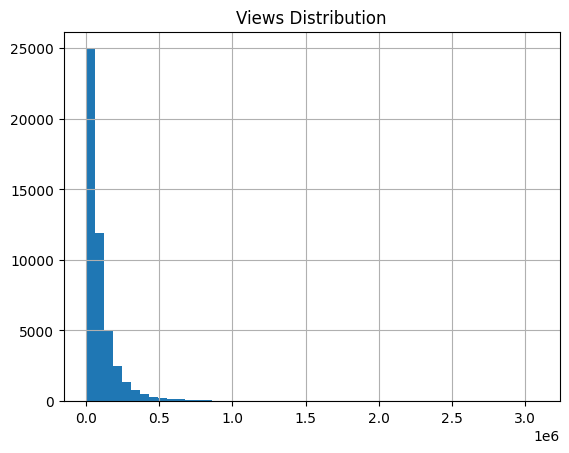

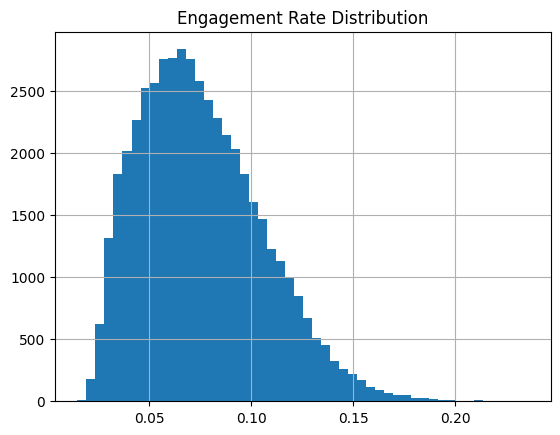

In [4]:
df_raw['views'].hist(bins=50)
plt.title("Views Distribution")
plt.show()

df_raw['engagement_rate'].hist(bins=50)
plt.title("Engagement Rate Distribution")
plt.show()


In [5]:
df_raw.groupby("trend_label")['completion_rate'].mean()
df_raw.groupby("trend_label")['engagement_rate'].mean()
df_raw.groupby("trend_label")['views'].median()


trend_label
declining    59718.0
rising       59638.0
seasonal     60453.0
stable       58809.0
Name: views, dtype: float64

Text(0.5, 0.98, '')

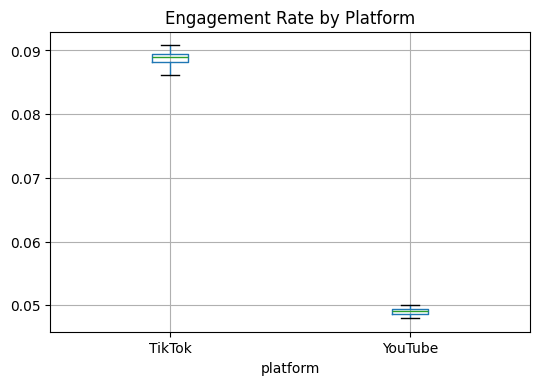

In [6]:
df_country.groupby('platform')['median_er'].mean()
df_country.groupby('platform')['avg_engagement_per_1k'].mean()
df_country.boxplot(column='median_er', by='platform', figsize=(6,4))
plt.title("Engagement Rate by Platform")
plt.suptitle("")




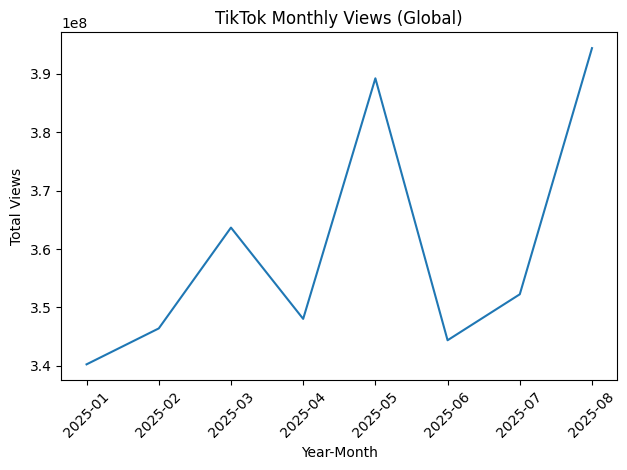

In [7]:
# Example: TikTok global monthly views (sum over all countries)
tiktok_monthly = (
    df_monthly[df_monthly['platform'] == 'TikTok']
    .groupby('year_month')['views']
    .sum()
    .reset_index()
)

plt.plot(tiktok_monthly['year_month'], tiktok_monthly['views'])
plt.title("TikTok Monthly Views (Global)")
plt.xlabel("Year-Month")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




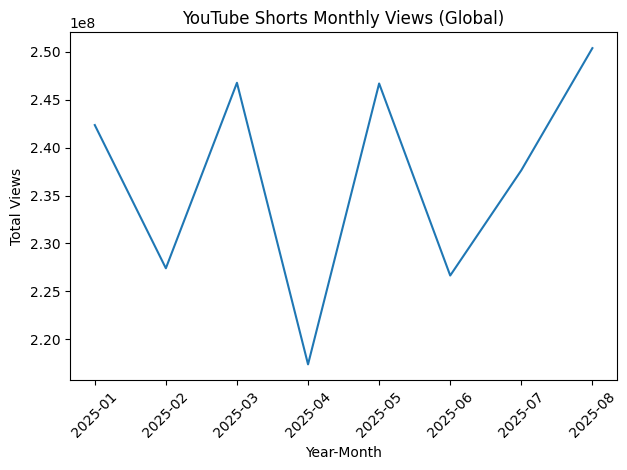

In [8]:
yt_monthly = (
    df_monthly[df_monthly['platform'] == 'YouTube']
    .groupby('year_month')['views']
    .sum()
    .reset_index()
)

plt.plot(yt_monthly['year_month'], yt_monthly['views'])
plt.title("YouTube Shorts Monthly Views (Global)")
plt.xlabel("Year-Month")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
